# How to Use Normal Distribution like You Know What You Are Doing
## Become ridiculously good at Normal Distribution
<img src='images/know.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@eva-elijas?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Eva Elijas</a>
        on 
        <a href='https://www.pexels.com/photo/dirty-texture-wall-winter-5941184/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [44]:
import numpy as np
import pandas as pd

from empiricaldist import Pmf
from empiricaldist import Cdf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### Introduction

You wake up a statistician in the middle of the night and ask them about the formula of the Normal Distribution. Half-asleep, half-dreaming, they will recite this formula to the letter:

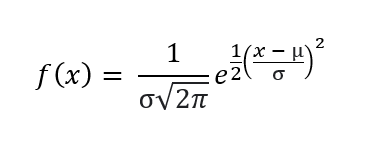

Normal distribution is one of the most fundamental things in our universe. It shows up almost everywhere, in nature, science, math. Even the craziest phenomena such as protons bumping into each other, actions of crowds of people, etc. can be modeled using a normal distribution. 

When we plot a normally distributed data, it generally forms a bell-shaped pattern:

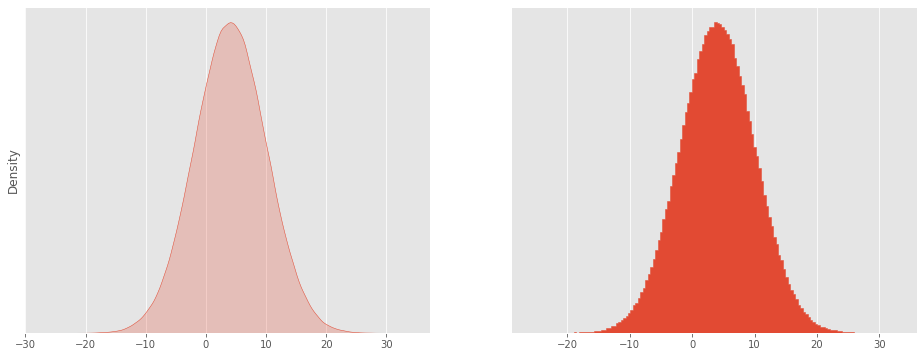

In [3]:
# Create fig, ax objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create a normal distribution
normal = np.random.normal(4, 6, size=1000000)

# Plot the distribution with a kdeplot
sns.kdeplot(normal, ax=ax1, fill=True)
for ax in [ax1, ax2]:
    ax.set_yticks([])
    ax.set_yticklabels([])
# Plot the distribution with a histogram
ax2.hist(normal, histtype='step', bins=150, fill=True)

plt.show();

That's why you will also hear it called the **bell curve** or **Gaussian distribution** (named after the German mathematician, Karl Gauss who discovered it). 

It has many implications in the business world, too. It is so ubiquitous that Data Scientists and statisticians analyze much of new data starting with normality assumptions. Besides, because of the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) which we will discuss later, you can derive the normal distribution even when the underlying distribution is not normal. 

In this post, you will learn how to use this king of distributions in your daily workflow by building a theoretical understanding and applying the ideas through code.

### Normal Distribution Teaser

Normal distribution is the best thing you can dream of during your analysis. It has many 'nice' properties that make it easy to work with and derive results.

Before we looked at the bell-shaped curve of the ND. The height of the curve is determined by the value of the standard deviation. Smaller standard deviation means much more data points are clustered around the mean while bigger value represents a more spread-out distribution. This can also be interpreted that the density (more on this later) of the curve is determined by the standard deviation. 

The mean of the ND moves the center around the XAxis:

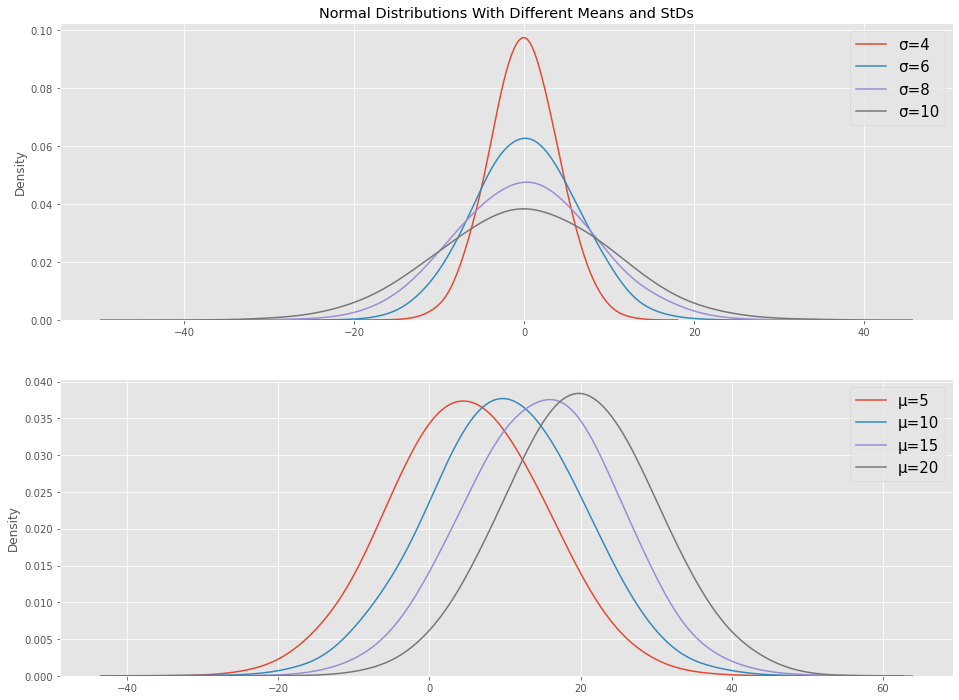

In [19]:
# Create a figure and axis objects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

stds = [4, 6, 8, 10]
means = [5, 10, 15, 20]

for std in stds:
    # Create a normal distribution
    normal = np.random.normal(0, std, size=10000)
    # Plot the PDF
    sns.kdeplot(normal, bw_adjust=2, ax=ax1, label=f'σ={str(std)}')
# Plot the legend
ax1.legend(fontsize=15)

for mu in means:
    # Create a normal distribution
    normal = np.random.normal(mu, 10, size=10000)
    # Plot the PDF
    sns.kdeplot(normal, bw_adjust=2, ax=ax2, label=f'μ={str(mu)}')
# Plot the legend
ax2.legend(fontsize=15)

ax1.set(title='Normal Distributions With Different Means and StDs')

plt.show();

As you see, the theoretically perfect ND has a single peak and it is also where the line of symmetry crosses the distribution. Moreover, these statements can be made about the perfect ND:
- The mean, median and mode are all equal.
- Exactly the half of the values are to the left of the line of symmetry and the exactly half to the right.
- The total area under the curve is always equal to 1.

Of course, it is rarely the case that the real data follows a perfect bell-shaped pattern. However, it is worth estimating the similarity between the perfect ND and the underlying distribution to see if we can treat safely treat it as normal. We will see how to generate this similarity process in the next couple of sections.

### What is PDF really?

So far, we were looking and looking at the plots of NDs but we did not ask what function generates these plots. To answer this, you need to understand what continuous probability distributions are.

According to descriptive statistics, there are two types of data: discrete and continuous. Any data that is recorded by counting is discrete (integer values) such as the results of test scores, number of apples you eat per day, how many times you stop at red light, etc. Contrastingly, continuous data is any data that is recorded by measuring such as height, weight, distance, etc. Time itself is also considered as continuous data. 

One defining aspect of continuous data is that the same data can be represented in different units of measurement. For example, distance can be measured in miles, kilometers, meters, centimeters, millimeters and the list _**continues**_. No matter how small, a smaller unit of measurement can be found for continuous data. This also suggests that there can be infinitely many decimal points for a single measurement.

In probability, if a random experiment generates continuous outcomes, it will have a continuous probability distribution. For example, let's say random variable *X* stores the amount of rain every day in inches. Now, it is extremely unlikely for the amount of rain to take an integer value because we cannot say that it rained exactly 2 inches today, not a single water molecule more or less. The probability of that happening is so small that we can safely say it is 0. The same can be true for other values such 2.1 or 2.0000091 or 2.000000001. The odds of it raining exactly at some amount is always 0. That's why for continuous distributions we have different functions called Probability Density Functions. If you were reading my [recent posts](https://towardsdatascience.com/how-to-use-poisson-distribution-like-you-know-what-you-are-doing-c095c1e477c1?source=your_stories_page-------------------------------------), Probability Mass Functions computed the probability of discrete events such as die rolls, coin flips or any other [Bernoulli trials](https://towardsdatascience.com/how-to-think-probabilistically-with-discrete-distributions-ea28e2bcafdc?source=your_stories_page-------------------------------------).

Probability Mass Functions encode the probability of an outcome as height. Here is an example PMF plot of a single die roll:

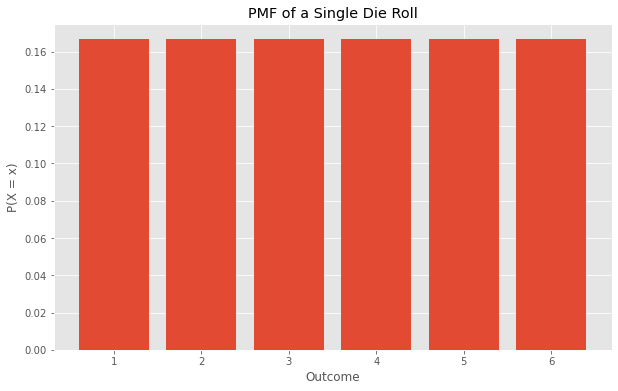

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

pmf = Pmf.from_seq([1, 2, 3, 4, 5, 6])

ax.bar(pmf.index, pmf)
ax.set(title='PMF of a Single Die Roll', xlabel='Outcome', ylabel='P(X = x)')
plt.show();

As you see, the height of each bar represents the probability of a single outcome like 1, 3, or 5. They are all at the same height because a die roll has a discrete uniform distribution. 

Now, Probability Mass functions use *area* to represent a certain probability. Before I explain why, think about what would happen if they also encoded probability in height. Like I said, there is such a small probability for a continuous data to take a certain value that the heights would all go down to 0 like this:

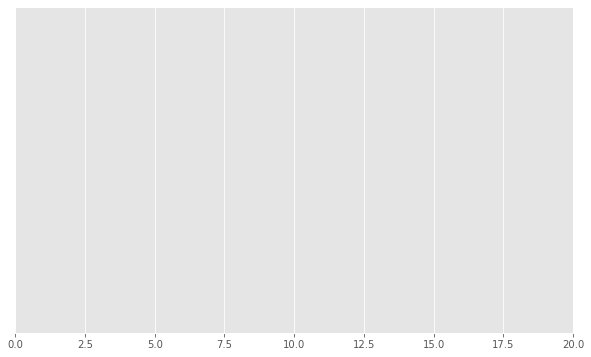

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axis([0, 20, 0, 20])
ax.set_yticks([])
ax.set_yticklabels([])

plt.show();

Remember the most favorite formula of statisticians?

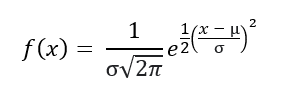

That is the formula for Probability Density Function of a normal distribution. On its own, it cannot do much. For an ND with a know mean and standard deviation, you can input any *x* value into the function. It outputs the height of the curve at that point on the XAxis. Notice I am not saying the *probability* just height of the curve. As I said, for continuous distributions area represents a certain probability. Well, a thin line on a plot does not have an area so we need to reframe our initial question.

For our random experiment of observing the amount of rain every day, we will stop asking questions like what is the probability of raining 3 inches or 2.5 inches because the answer would always be 0. Instead, we now ask what is the probability of it raining between 1.6 and 1.9 inches. This would be equal to asking what is the area under the curve between these two lines:

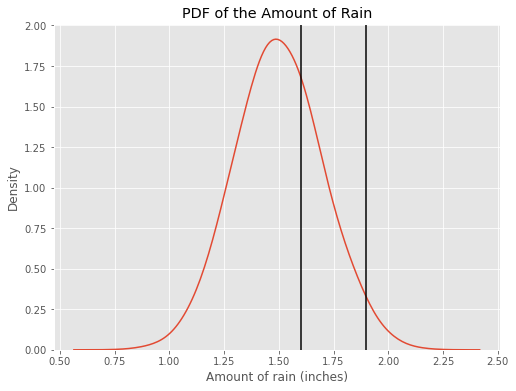

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create the distribution
normal = np.random.normal(1.5, 0.2, size=10000)

# Plot a KDE
sns.kdeplot(normal, bw_adjust=2, ax=ax)
# Set an interval using vertical lines
ax.axvline(x=1.6, c='black')
ax.axvline(x=1.9, c='black')

# Labelling
ax.set(title='PDF of the Amount of Rain', xlabel='Amount of rain (inches)')
plt.show();

For those who did their homework on calculus, it is computed using this integral formula:

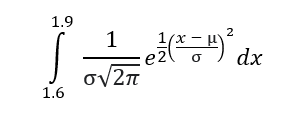

> Wait, wait! Don't go yet. We won't compute this here by hand or even using code. Later I will show you a much easier way of computing this. 

The above formula yields some number between 0 and 1 as the probability of it raining between 1.6 and 1.9 inches. Now, an obvious question is what do we interpret from the YAxis since it does not give the probability. Well, I am in no way qualified to answer this question, so I suggest you reading this [thread](https://stats.stackexchange.com/questions/491127/what-does-y-axis-mean-in-continuous-probability-distribution) from StackExchange and watch this [awesome video](https://www.youtube.com/watch?v=ZA4JkHKZM50) by 3Blue3Brown.

Next, we will talk about the Cumulative Distribution function which provides us with a better tool to compute probabilities under areas and maybe an improved visual of NDs.

### Cumulative Distribution Function


At this point, I think we already agreed that the plot of a normal distribution has a curve. We have already seen the bell-shaped one, now, it is time to see the sigmoid one:

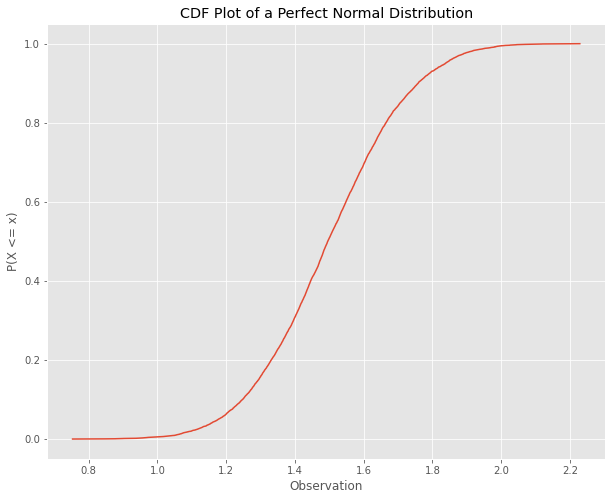

In [46]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))
# Create the CDF
cdf_normal = Cdf.from_seq(normal)
# Create the CDF plot
ax.plot(cdf_normal)
# Labelling
ax.set(title='CDF Plot of a Perfect Normal Distribution',
       xlabel='Outcomes',
       ylabel='P(X <= x)')

plt.show();

Before we interpret this, let's understand what Cumulative Distribution Function (CDF) is. It is best we start with a simple example:

In [47]:
Cdf.from_seq([1, 2, 3, 4, 5, 6])

,probs
1,0.166667
2,0.333333
3,0.500000
4,0.666667
5,0.833333
6,1.000000


If we take a random number from any distribution and input it to CDF, the result tells us the probability of getting a value that is less than or equal to that random number. The above is a CDF of a single die roll. A die roll has a distribution of 1, 2, 3, 4, 5, 6. Let's say we chose 4 randomly. What is the probability of observing a value that is less than or equal to 4 from our distribution? According to the above CDF, it is 0.6666. Similarly, there is a 100% chance of observing a value that is less than or equal to 6 because all values are smaller or equal to 6 in our distribution.

In notation, this would look like this:

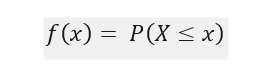

So, to compute the CDF, the initial step is to compute the individual probabilities of each outcome. Then, the Cumulative Probability of any value *x* will be the sum of all ordered individual probabilities up to *x* in our distribution.

Now, going back to the CDF of a normal distribution, we can easily interpret it:

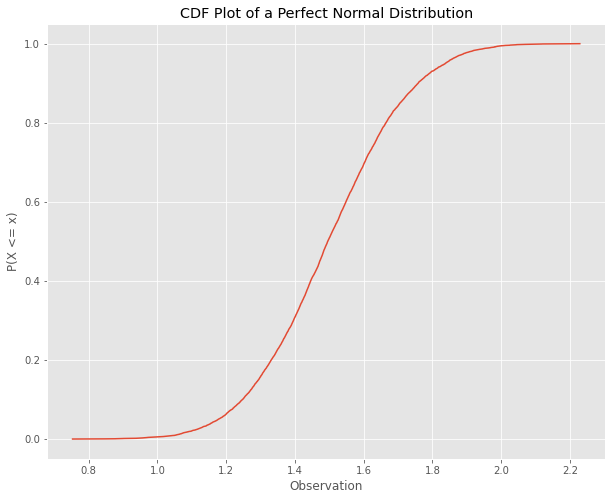

In [48]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))
# Create the CDF
cdf_normal = Cdf.from_seq(normal)
# Create the CDF plot
ax.plot(cdf_normal)
# Labelling
ax.set(title='CDF Plot of a Perfect Normal Distribution',
       xlabel='Outcomes',
       ylabel='P(X <= x)')

plt.show();

This curve is also called the sigmoid. The mean of the ND is the center of the curve:

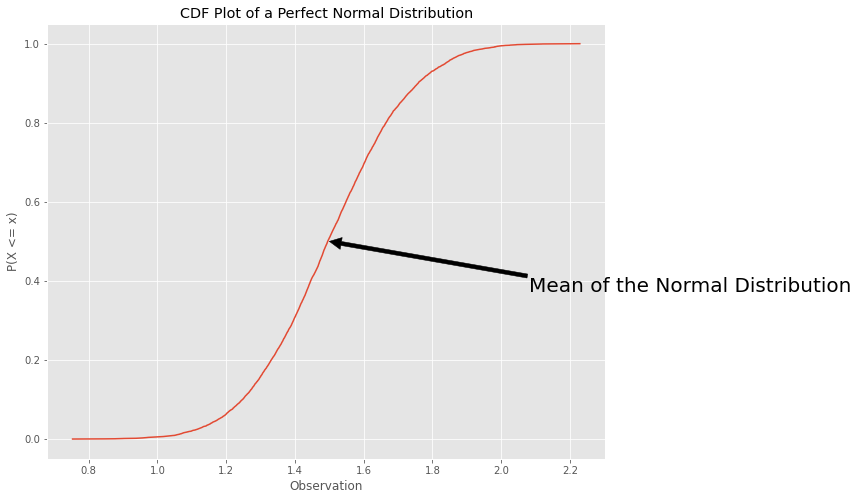

In [55]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))
# Create the CDF
cdf_normal = Cdf.from_seq(normal)
# Create the CDF plot
ax.plot(cdf_normal)
# Labelling
ax.set(title='CDF Plot of a Perfect Normal Distribution',
       xlabel='Outcomes',
       ylabel='P(X <= x)')
ax.annotate('Mean of the Normal Distribution', 
            xy=(1.5, 0.5),
            xycoords='data', xytext=(200, -50),
            textcoords='offset points', 
            arrowprops={'color': 'black'},
            fontsize=20)
plt.show();

Using the CDF, you don't have to use the formula of the ND. For example, to find the probability of *X* falling between 1.6 and 1.9, you will find the upper limit's CDF and subtract the CDF of the lower limit:

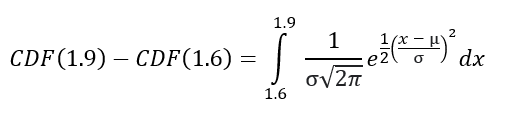

So simple!

### Finally, Python Normal Stuff

Finally, I will reveal how I was plotting all these bell-curves and CDFs. First of all, the bell curve of any distribution can be generated using Seaborn's `kdeplot` function.


To plot this distribution, we need to create the distribution itself. This can be done using `numpy.random.normal`:

In [81]:
import numpy as np

normal_dist = np.random.normal(loc=5, scale=2, size=10000)
normal_dist

array([3.48434801, 3.88156227, 0.91860114, ..., 4.74846979, 5.71951104,
       3.69904932])

Here, we are drawing 10k samples from a normal distribution with the mean of 5 and the standard deviation of 2. Next, we will use the `kdeplot` to make the curve:

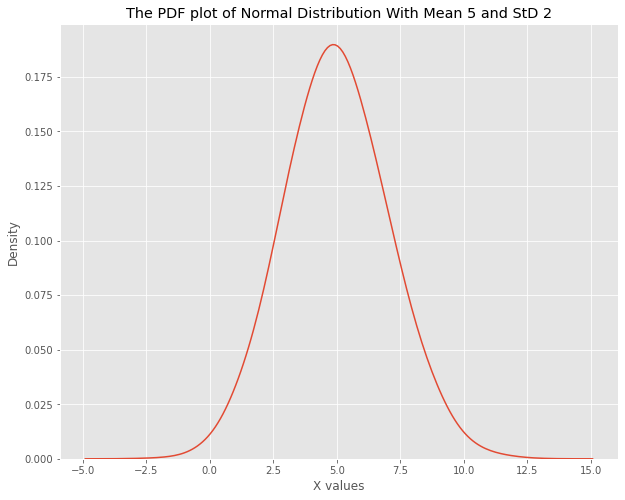

In [82]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the curve
sns.kdeplot(normal_dist, bw_adjust=2, ax=ax)
# Labeling
ax.set(title='The PDF plot of Normal Distribution With Mean 5 and StD 2',
       xlabel='X values', ylabel='Density')

plt.show();

`kdeplot` takes any sequence of values as a distribution. Its `bw_adjust` parameter controls the smoothness of the curve. For more info on the function, visit the [documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

Now, there is a little more work required to create the CDF. We could generate it by hand but we will use `Cdf` function of the `empiricaldist` library:

In [84]:
from empiricaldist import Cdf

`Cdf` has a `from_seq` method which computes any distributions CDF:

In [85]:
normal_dist = np.random.normal(2, 5, size=10000)

normal_cdf = Cdf.from_seq(normal_dist)
normal_cdf

,probs
-20.403656,0.0001
-15.382777,0.0002
-15.028300,0.0003
-14.880744,0.0004
-14.173374,0.0005
...,...
17.449257,0.9996
17.960153,0.9997
18.094767,0.9998
18.505124,0.9999


Next, we will plot this distribution with `pyplot`:

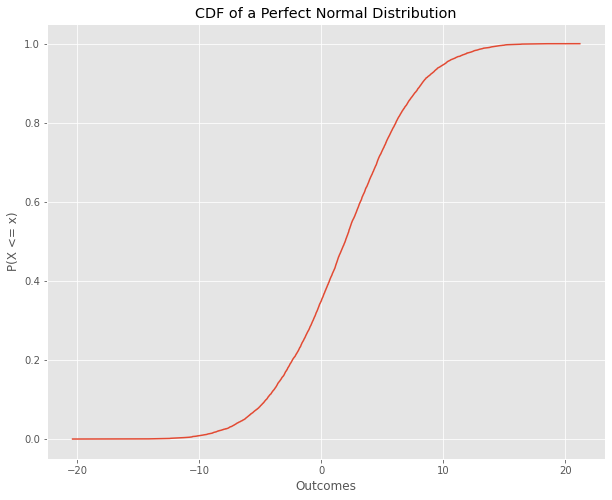

In [86]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the CDF
ax.plot(normal_cdf)
# Labeling
ax.set(title='CDF of a Perfect Normal Distribution', 
       xlabel='Outcomes', ylabel='P(X <= x)')

plt.show();

As expected, we see the smooth sigmoid on the plot.

Lastly, we will look at a practical use case. We will use CDF plots to find out if a given distribution is normal. As an example, I will load the Iris dataset from Seaborn:

In [100]:
iris = sns.load_dataset('iris').dropna()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In the early sections that many natural phenomena follow a normal distribution so we can assume that the measurements of iris flower species follow a normal distribution. Let's see how correct we are:

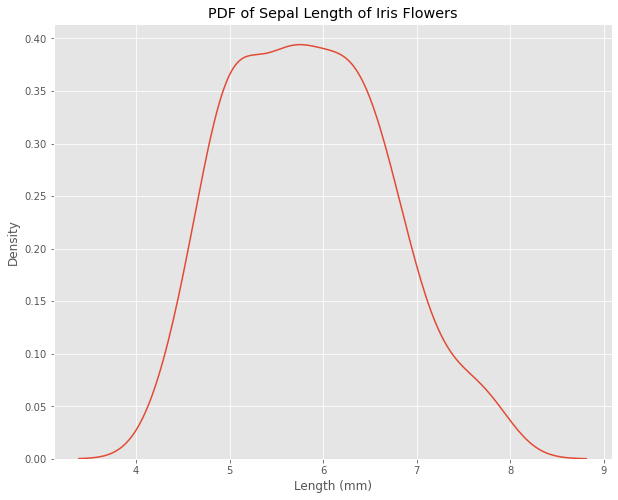

In [102]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the KDE plot to see if it follows a normal dist
sns.kdeplot(iris['sepal_length'], ax=ax)

# Labeling
ax.set(title='PDF of Sepal Length of Iris Flowers',
       xlabel='Length (mm)', ylabel='Density')

plt.show();

From an eyeball estimate, we can already see that our assumption is not correct. However, just to make sure it would be better to plot the perfect normal ND for comparison. Which ND you ask? Of course there are infinitely many NDs so how do we choose it?

Well, we would be wise to plot the ND that has the same mean and standard deviation of our underlying distribution so that the two distributions would be close.

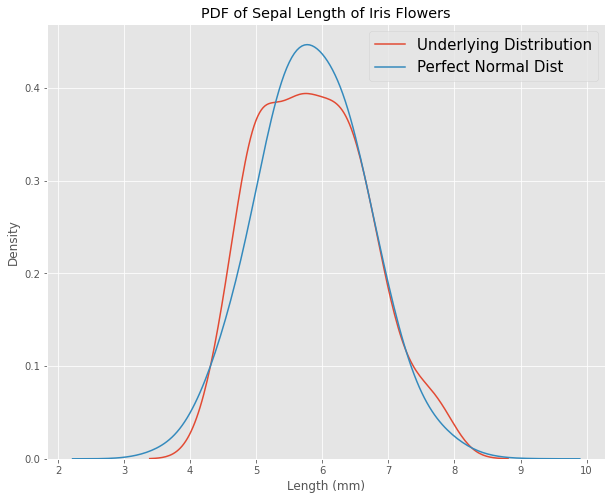

In [105]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the KDE plot to see if it follows a normal dist
sns.kdeplot(iris['sepal_length'], ax=ax, label='Underlying Distribution')

# Get the parameters from the underlying dist
sepal_mean = iris['sepal_length'].mean()
sepal_std = iris['sepal_length'].std()

# Create the ND using the above params
sepal_normal = np.random.normal(sepal_mean, sepal_std, size=10000)

# Add it to the plot for comparison
sns.kdeplot(sepal_normal, bw_adjust=2, label='Perfect Normal Dist')

# Labeling
ax.set(title='PDF of Sepal Length of Iris Flowers',
       xlabel='Length (mm)', ylabel='Density')

# Show the legend
ax.legend(fontsize=15)

plt.show();

Now, it is much clearer that the two distributions are completely different. However, there are many cases where the two distributions are very close to each other but not quite the same, i. e. not normal. Comparing close bell-curves are not easy thing for the human eye. So we need to use a better visual to compare such distributions. I think you already guessed it but we will use the CDF.

We will use the same technique like above but replace the PDF with CDF:

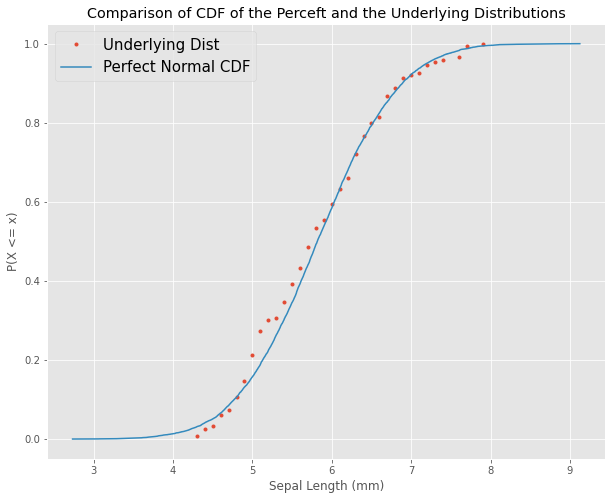

In [110]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the CDF of sepal lengths
sepal_cdf = Cdf.from_seq(iris['sepal_length'])
# Plot the CDF
ax.plot(sepal_cdf, label='Underlying Dist', marker='.', linestyle='none')

# Create the perfect Normal Dist and its CDF
normal_dist = np.random.normal(sepal_mean, sepal_std, size=10000)
normal_cdf = Cdf.from_seq(normal_dist)

# Plot it
ax.plot(normal_cdf, label='Perfect Normal CDF')

# Show the legend
ax.legend(fontsize=15)
# Labeling
ax.set(title='Comparison of CDF of the Perceft '
       'and the Underlying Distributions',
       xlabel='Sepal Length (mm)',
       ylabel='P(X <= x)')

plt.show();

As always, we generate the CDF of sepal lengths and plot it as a line. Next, we take the mean and std of sepal lengths and generate a perfect normal distribution with these parameters. Then, we generate the CDF for that too and plot them on top of each other. For clarity, I used dots as a marker omitting the linestyle. This view gives a much better visual comparison than line-by-line comparison.

Now, interpreting this, we can see that the distributions are not that different. We also have to take into account that the sample size is very small (150). 

In short, if you want to simulate a normal distribution, use `np.random.normal`. Try to increase the sample size for better accuracy. If you want to find out if a distribution is normal or not, try plotting its CDF and a CDF of a perfect ND with the parameters of the underlying distribution.